In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
csvpath_chi_crime_12 = os.path.join('Chicago', 'chicago_crime_2012.csv')
csvpath_chi_crime_19 = os.path.join('Chicago', 'chicago_crime_2019.csv')
csvpath_LA_crime_12 = os.path.join('LA Data', 'la_crime_2012.csv')
csvpath_LA_crime_19 = os.path.join('LA Data', 'la_crime_2019.csv')
csvpath_philly_crime_12 = os.path.join('Philadelphia', 'Philadelphia Crime Data 2012.csv')
csvpath_philly_crime_19 = os.path.join('Philadelphia', 'Philadelphia Crime Data 2019.csv')
csvpath_ny_crime_12 = os.path.join('NYC Data', 'ny_crime_2012.csv')
csvpath_ny_crime_19 = os.path.join('NYC Data', 'ny_crime_2019.csv')

In [3]:
# Reading in csv data sets 

with open(csvpath_chi_crime_12) as csvfile_chi_crime_12:
    csvreader_chi_crime_12 = csv.reader(csvfile_chi_crime_12, delimiter=",")
    csv_header = next(csvreader_chi_crime_12) 
    chi_crime_12_first = pd.DataFrame(csvreader_chi_crime_12)

with open(csvpath_chi_crime_19) as csvfile_chi_crime_19:
    csvreader_chi_crime_19 = csv.reader(csvfile_chi_crime_19, delimiter=",")
    csv_header = next(csvreader_chi_crime_19) 
    chi_crime_19_first = pd.DataFrame(csvreader_chi_crime_19)

with open(csvpath_LA_crime_12) as csvfile_LA_crime_12:
    csvreader_LA_crime_12 = csv.reader(csvfile_LA_crime_12, delimiter=",")
    csv_header = next(csvreader_LA_crime_12) 
    LA_crime_12_first = pd.DataFrame(csvreader_LA_crime_12)

with open(csvpath_LA_crime_19) as csvfile_LA_crime_19:
    csvreader_LA_crime_19 = csv.reader(csvfile_LA_crime_19, delimiter=",")
    csv_header = next(csvreader_LA_crime_19) 
    LA_crime_19_first = pd.DataFrame(csvreader_LA_crime_19)
    
with open(csvpath_philly_crime_12) as csvfile_philly_crime_12:
    csvreader_philly_crime_12 = csv.reader(csvfile_philly_crime_12, delimiter=",")
    csv_header = next(csvreader_philly_crime_12) 
    philly_crime12_df_first = pd.DataFrame(csvreader_philly_crime_12)

with open(csvpath_philly_crime_19) as csvfile_philly_crime_19:
    csvreader_philly_crime_19 = csv.reader(csvfile_philly_crime_19, delimiter=",")
    csv_header = next(csvreader_philly_crime_19) 
    philly_crime19_df_first = pd.DataFrame(csvreader_philly_crime_19)
    
with open(csvpath_ny_crime_12) as csvfile_ny_crime_12:
    csvreader_ny_crime_12 = csv.reader(csvfile_ny_crime_12, delimiter=",")
    csv_header = next(csvreader_ny_crime_12)
    ny_crime12_df_first = pd.DataFrame(csvreader_ny_crime_12)
    
with open(csvpath_ny_crime_19) as csvfile_ny_crime_19:
    csvreader_ny_crime_19 = csv.reader(csvfile_ny_crime_19, delimiter=",")
    csv_header = next(csvreader_ny_crime_19)
    ny_crime19_df_first = pd.DataFrame(csvreader_ny_crime_19)

In [4]:
# Cleaning & Renaming DataFrame Columns 

chi_crime_12 = chi_crime_12_first.rename(columns={1:"ID", 2:"Case Number", 3:"Date", 4:"Type", 5:"Description"})
chi_crime_19 = chi_crime_19_first.rename(columns={1:"ID", 2:"Case Number", 3:"Date", 4:"Type", 5:"Description"})

LA_crime_12 = LA_crime_12_first.rename(columns={1:"Directory #", 2:"Date", 3:"Crime Code", 4:"Description"})
LA_crime_19 = LA_crime_19_first.rename(columns={1:"Directory #", 2:"Date", 3:"Crime Code", 4:"Description"})

philly_crime_12 = philly_crime12_df_first.rename(columns={0:"Date", 1:"Time", 2:"Crime"})
philly_crime_19 = philly_crime19_df_first.rename(columns={0:"Date", 1:"Time", 2:"Crime"})

ny_crime_12 = ny_crime12_df_first.rename(columns={0:"ID", 1:"Case Number", 2:"Date", 3:"Description"})
ny_crime_19 = ny_crime19_df_first.rename(columns={0:"ID", 1:"Case Number", 2:"Date", 3:"Description"})

In [5]:
# Converting Date columns to datetimeindex format and creating new Month column

chi_crime_12['Month'] = pd.DatetimeIndex(chi_crime_12['Date']).month
chi_crime_19['Month'] = pd.DatetimeIndex(chi_crime_19['Date']).month

In [ ]:
LA_crime_12['Month'] = pd.DatetimeIndex(LA_crime_12['Date']).month
LA_crime_19['Month'] = pd.DatetimeIndex(LA_crime_19['Date']).month

In [ ]:
philly_crime_12['Month'] = pd.DatetimeIndex(philly_crime_12['Date']).month
philly_crime_19['Month'] = pd.DatetimeIndex(philly_crime_19['Date']).month

In [6]:
ny_crime_12['Month'] = pd.DatetimeIndex(ny_crime_12['Date']).month
ny_crime_19['Month'] = pd.DatetimeIndex(ny_crime_19['Date']).month

In [ ]:
# Grouping by Month column and finding total number of cases per month using the number of unique crime IDs

chi_crime_month_12 = chi_crime_12.groupby(['Month']).nunique(['ID'])
chi_crime_month_19 = chi_crime_19.groupby(['Month']).nunique(['ID'])

In [ ]:
LA_crime_month_12 = LA_crime_12.groupby(['Month']).nunique(['Directory #'])
LA_crime_month_19 = LA_crime_19.groupby(['Month']).nunique(['Directory #'])

In [9]:
ny_crime_month_12 = chi_crime_12.groupby(['Month']).nunique(['ID'])
ny_crime_month_19 = chi_crime_19.groupby(['Month']).nunique(['ID'])
ny_crime_month_19

,0,ID,Case Number,Date,Type,Description,6,7,8,9,10,11,12,13,14,15,16,17
Month,,,,,,,,,,,,,,,,,,
1,19669,19669,19668,9807,30,256,1,1,1,1,1,1,1,1,1,1,1,1
2,18411,18411,18410,9118,28,246,1,1,1,1,1,1,1,1,1,1,1,1
3,20421,20421,20421,10366,29,257,1,1,1,1,1,1,1,1,1,1,1,1
4,21009,21009,21005,10331,31,264,1,1,1,1,1,1,1,1,1,1,1,1
5,23643,23643,23641,11317,30,259,1,1,1,1,1,1,1,1,1,1,1,1
6,23597,23597,23595,11203,29,271,1,1,1,1,1,1,1,1,1,1,1,1
7,24843,24843,24841,11697,29,285,1,1,1,1,1,1,1,1,1,1,1,1
8,24386,24386,24384,11486,31,278,1,1,1,1,1,1,1,1,1,1,1,1
9,22423,22423,22421,10811,31,265,1,1,1,1,1,1,1,1,1,1,1,1


In [33]:
philly_crime_month_12 = philly_crime_12.groupby(['Month']).size().to_frame('size')
philly_crime_month_19 = philly_crime_19.groupby(['Month']).size().to_frame('size')
philly_crime_month_19

,size
Month,
1,12018
2,10875
3,12195
4,13329
5,14458
6,14468
7,15165
8,14962
9,14616


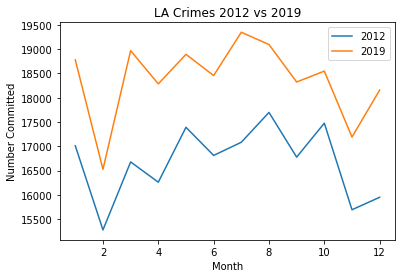

In [10]:
x1 = np.arange(1,13,1)    
y1 = LA_crime_month_12['Directory #']
plt.plot(x1, y1, label = "2012")
x2 = np.arange(1,13,1)  
y2 = LA_crime_month_19['Directory #']
plt.plot(x2, y2, label = "2019")
plt.xlabel('Month')
plt.ylabel('Number Committed')
plt.title('LA Crimes 2012 vs 2019')
plt.legend()
plt.show()

#WE NEED TO GET THE Y AXIS HERE TO HAVE A MAX LIMIT OF 100 TO GRAPH ON TOP OF WEATHER DATA


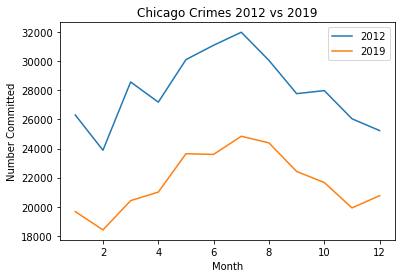

In [30]:
x1 = np.arange(1,13,1)    
y1 = chi_crime_month_12['ID']
plt.plot(x1, y1, label = "2012")
x2 = np.arange(1,13,1)  
y2 = chi_crime_month_19['ID']
plt.plot(x2, y2, label = "2019")
plt.xlabel('Month')
plt.ylabel('Number Committed')
plt.title('Chicago Crimes 2012 vs 2019')
plt.legend()
plt.show()

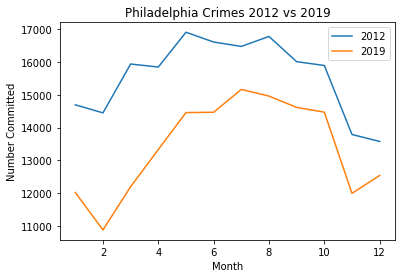

In [31]:
x1 = np.arange(1,13,1)    
y1 = philly_crime_month_12['size']
plt.plot(x1, y1, label = "2012")
x2 = np.arange(1,13,1)  
y2 = philly_crime_month_19['size']
plt.plot(x2, y2, label = "2019")
plt.xlabel('Month')
plt.ylabel('Number Committed')
plt.title('Philadelphia Crimes 2012 vs 2019')
plt.legend()
plt.show()




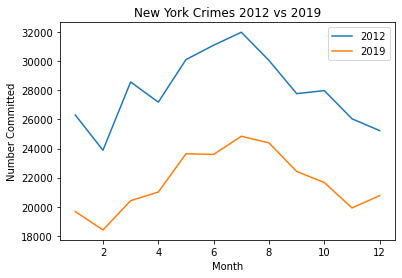

In [10]:
x1 = np.arange(1,13,1)    
y1 = ny_crime_month_12['ID']
plt.plot(x1, y1, label = "2012")
x2 = np.arange(1,13,1)  
y2 = ny_crime_month_19['ID']
plt.plot(x2, y2, label = "2019")
plt.xlabel('Month')
plt.ylabel('Number Committed')
plt.title('New York Crimes 2012 vs 2019')
plt.legend()
plt.show()